In [130]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.feature_extraction.text import TfidfVectorizer


data = pd.read_sql_query("SELECT * FROM 'mortgage complaints'", "sqlite:///StaterData.db")

# Drop dates for testing purposes
# data.drop(['Date received', 'Date sent to company'], axis=1)

#Limit test size due to performance issues


In [131]:
data.head(5)

,index,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,0,2021-05-25 00:00:00.000000,Mortgage,FHA mortgage,Applying for a mortgage or refinancing an exis...,None,I am to the closing point of refinancing with ...,None,"PLANET HOME LENDING, LLC",MN,55330,None,1,Web,2021-05-25 00:00:00.000000,Closed with explanation,1,1,4403834
1,5,2023-02-09 00:00:00.000000,Mortgage,Conventional home mortgage,Trouble during payment process,None,I filed a complaint with the CFPB about Wells ...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NJ,07005,Older American,1,Web,2023-02-09 00:00:00.000000,Closed with explanation,1,1,6550930
2,7,2018-01-23 00:00:00.000000,Mortgage,Conventional home mortgage,Struggling to pay mortgage,None,I am trying to save my home from foreclosure b...,Company believes it acted appropriately as aut...,"Servis One, Inc., Titusville, PA Branch",FL,33406,None,1,Web,2018-01-23 00:00:00.000000,Closed with explanation,1,1,2791568
3,9,2022-01-30 00:00:00.000000,Mortgage,Conventional home mortgage,Trouble during payment process,None,I have been unable to access the online portal...,Company has responded to the consumer and the ...,"LAKEVIEW LOAN SERVICING, LLC",AZ,85743,None,1,Web,2022-01-30 00:00:00.000000,Closed with explanation,1,1,5164317
4,10,2023-02-22 00:00:00.000000,Mortgage,FHA mortgage,Struggling to pay mortgage,None,I had a mortgage with Wells Fargo Home Mortgag...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,TX,77479,Older American,1,Web,2023-02-22 00:00:00.000000,Closed with explanation,1,1,6600763


In [134]:
data.shape

(103627, 19)

In [135]:
data['Issue'].value_counts()

Trouble during payment process                                                      33427
Struggling to pay mortgage                                                          17290
Loan servicing, payments, escrow account                                            14721
Loan modification,collection,foreclosure                                            10789
Applying for a mortgage or refinancing an existing mortgage                         10417
Closing on a mortgage                                                                7367
Application, originator, mortgage broker                                             3746
Settlement process and costs                                                         2249
Incorrect information on your report                                                 1407
Credit decision / Underwriting                                                       1289
Problem with a credit reporting company's investigation into an existing problem      619
Improper u

In [136]:
# Define your features and target
X = data['Consumer complaint narrative']  # text_column is the name of the column in your dataset that contains the text data
y = data['Issue']  # target_column is the name of the column in your dataset that contains the target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize your text data using a bag-of-words approach
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create a Decision tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.4553700665830358


In [146]:
# Finding the optimal depth for the decision tree
# List of values to try for max_depth:
max_depth_range = list(range(1, 20))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

max_accuracy = max(accuracy)
max_depth = max_depth_range[accuracy.index(max_accuracy)]
print("Max accuracy:", max_accuracy)
print("Corresponding max depth:", max_depth)

Max accuracy: 0.5019138602077905
Corresponding max depth: 14


In [147]:
# Import the f1 score and show how good the model is.
from sklearn.metrics import f1_score
f1 = f1_score(y_test, clf.predict(X_test), average='macro')
f1

0.23056263350640782

[[1304  522  314    8  159  128   26  212  414   46   44    1   17    1
     0]
 [ 388 6328  925   44 1204  295  122   94  374   66   32   10    3    2
     1]
 [ 243 1058 2459   15  330  788   65   63  119   47   20    1    2    2
     1]
 [   9   72   10   54   22    6   19    3    4    2    1    1    1    1
     0]
 [ 130 1401  334   17 1780  380   44  100  116   65   42    1    1    1
     1]
 [ 122  273  799    2  438 1241   25   97   71   84   30    1    1    0
     1]
 [  30  146   61   14   55   10   51   13    9   10    4    2    0    0
     0]
 [ 256  141   78    2  133  105   11  212  104   47   28    0    3    1
     0]
 [ 461  551  172    1  162   93   12   94  650   60   31    1    2    1
     1]
 [  68   94   74    3  111   99    7   66   91   55   11    0    0    1
     1]
 [  81   41   36    0   69   37    6   53   26   24   19    0    0    2
     0]
 [   0    0    1    0    2    0    0    2    0    1    0    0    0    0
     0]
 [  19   11    2    0    1    3    8    

<function matplotlib.pyplot.show(close=None, block=None)>

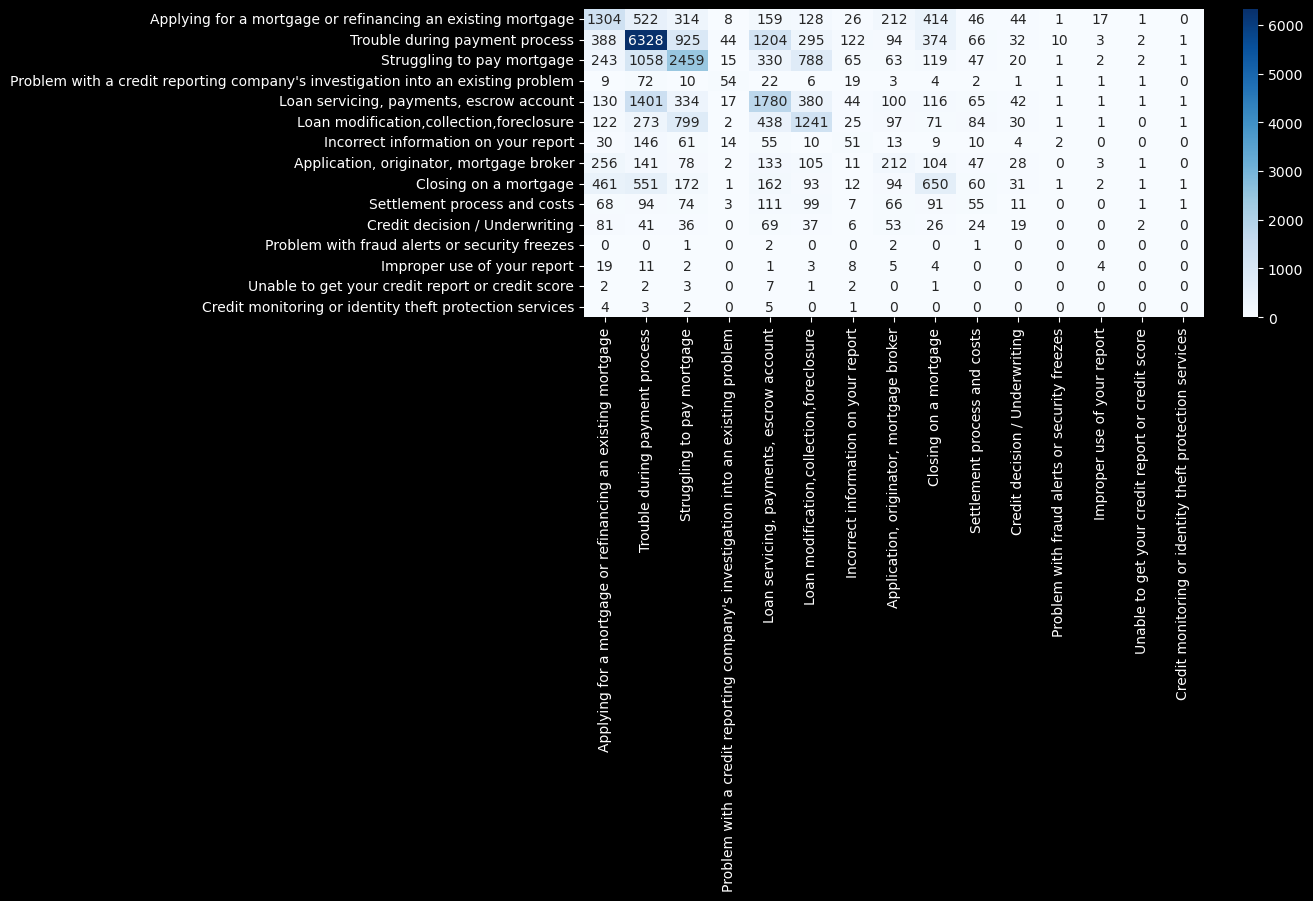

In [148]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=label)

# Print the confusion matrix
print(cm)


# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label, yticklabels=label)
plt.show

In [149]:
label = data['Issue'].unique()
label

array(['Applying for a mortgage or refinancing an existing mortgage',
       'Trouble during payment process', 'Struggling to pay mortgage',
       "Problem with a credit reporting company's investigation into an existing problem",
       'Loan servicing, payments, escrow account',
       'Loan modification,collection,foreclosure',
       'Incorrect information on your report',
       'Application, originator, mortgage broker',
       'Closing on a mortgage', 'Settlement process and costs',
       'Credit decision / Underwriting',
       'Problem with fraud alerts or security freezes',
       'Improper use of your report',
       'Unable to get your credit report or credit score',
       'Credit monitoring or identity theft protection services'],
      dtype=object)

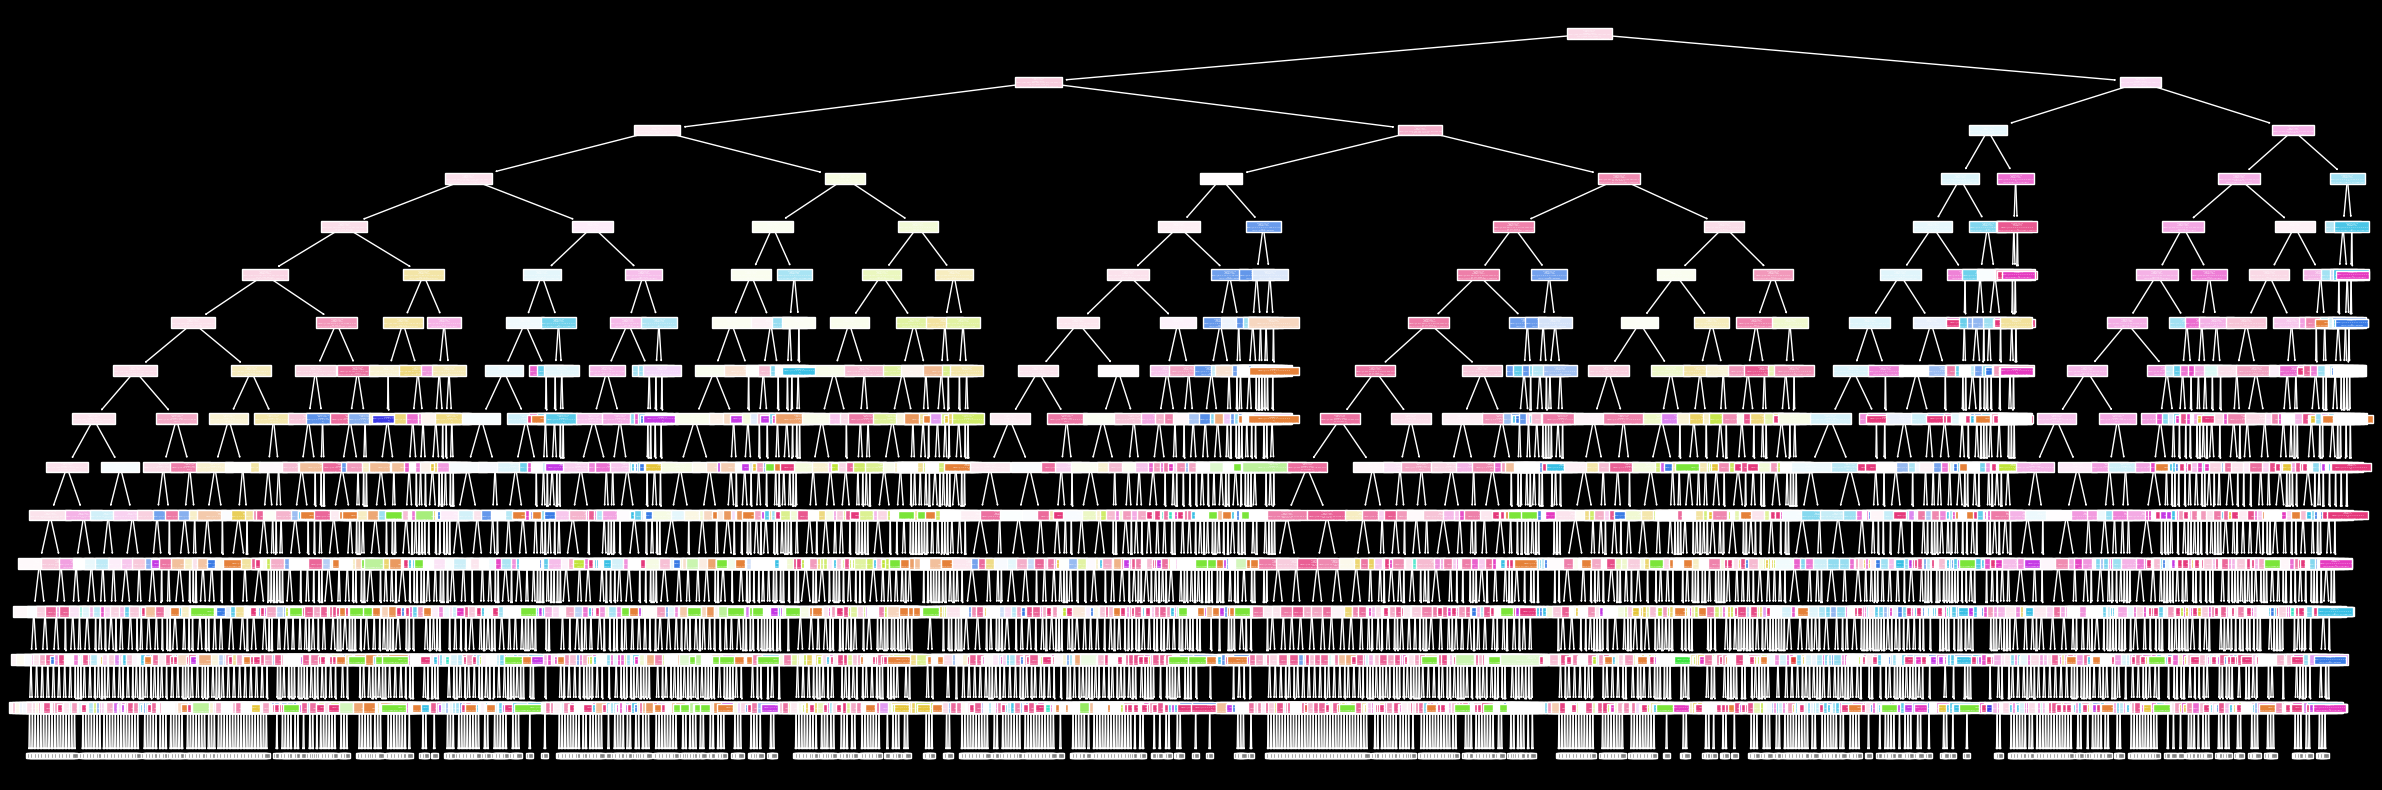

In [150]:
from sklearn.tree import plot_tree

# Visualize the first tree
plt.figure(figsize=(30, 10))
plot_tree(model, filled=True, max_depth=14, class_names=label, feature_names=None)
plt.show()
